In [1]:
from DM4Processor import DM4_Processor
import matplotlib.pyplot as plt
import numpy as np


In [2]:
DM4_Processor.load_file(r"D:\shenzhen_data.dm4")

In [3]:
DM4_Processor.raw_data.shape

(256, 256, 256, 256)

In [4]:
import py4DSTEM

In [5]:
data_cube = py4DSTEM.DataCube(data=DM4_Processor.raw_data)


In [6]:
print(data_cube)

DataCube( A 4-dimensional array of shape (256, 256, 256, 256) called 'datacube',
          with dimensions:

              Rx = [0,1,2,...] pixels
              Ry = [0,1,2,...] pixels
              Qx = [0,1,2,...] pixels
              Qy = [0,1,2,...] pixels
)


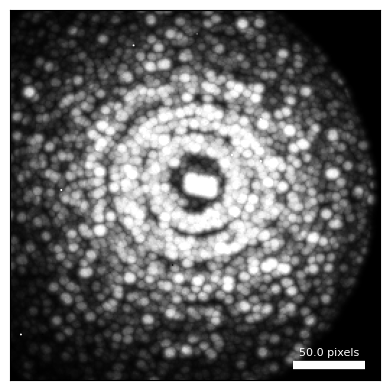

In [7]:
diffraction_pattern_mean = data_cube.get_dp_mean()
diffraction_pattern_max = data_cube.get_dp_max()

py4DSTEM.visualize.show(
    diffraction_pattern_max,
    figsize = (4, 4),
    ticks = False
)

In [8]:
diffraction_pattern_mean.data

array([[0.01280212, 0.01405334, 0.01377869, ..., 0.0080719 , 0.00823975,
        0.00694275],
       [0.01335144, 0.0145874 , 0.01652527, ..., 0.00744629, 0.00724792,
        0.00753784],
       [0.01339722, 0.01803589, 0.02339172, ..., 0.00827026, 0.00733948,
        0.00697327],
       ...,
       [0.0105896 , 0.01596069, 0.02523804, ..., 0.00598145, 0.00656128,
        0.00665283],
       [0.00987244, 0.01112366, 0.01391602, ..., 0.00669861, 0.0065155 ,
        0.00636292],
       [0.00941467, 0.01046753, 0.00959778, ..., 0.00598145, 0.00691223,
        0.0063324 ]])

Estimated probe radius = 5.51 pixels


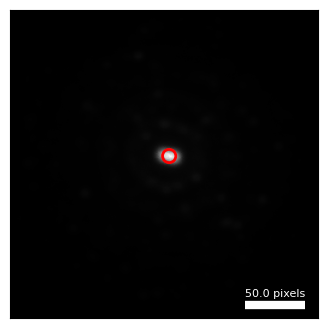

In [9]:
probe_semiangle, probe_x, probe_y = data_cube.get_probe_size(data_cube.tree('dp_mean').data,)
probe_center = (probe_x, probe_y)
fig, ax = py4DSTEM.show(
    data_cube.tree('dp_mean'),
    figsize = (4, 4),
    circle = {
        'center': probe_center,
        'R': probe_semiangle,
    },
    ticks = False,
    returnfig = True,
    vmax = 1
)

print('Estimated probe radius =', '%.2f' % probe_semiangle, 'pixels')

In [10]:
probe_radius_range = (probe_semiangle * 3, probe_semiangle * 6)

data_cube.get_virtual_image(
    mode = 'annulus',
    geometry = (
        probe_center,
        probe_radius_range
    ),
    name = 'dark_field'
)

100%|██████████| 65536/65536 [00:03<00:00, 16849.14it/s]


VirtualImage( A 2-dimensional array of shape (256, 256) called 'dark_field',
              with dimensions:

                  dim0 = [0,1,2,...] pixels
                  dim1 = [0,1,2,...] pixels
)

In [11]:
data_cube.tree('dark_field').data

array([[ 94752.,  95489.,  71065., ..., 103943., 105025.,  84527.],
       [ 95161.,  96246., 131818., ...,  92346., 122531.,  88508.],
       [ 92663., 109515.,  85075., ..., 104865.,  91987.,  89072.],
       ...,
       [ 59710.,  60480.,  55301., ..., 133845., 106777., 147219.],
       [ 58239.,  55992.,  59579., ..., 132710., 111663.,  70155.],
       [ 52821.,  54893.,  56715., ...,  52405.,  51690.,  48037.]])

<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

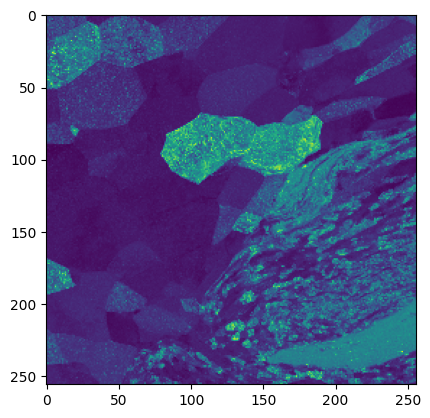

In [12]:

plt.imshow(data_cube.tree('dark_field').data)
plt.imshow


In [33]:
probe = py4DSTEM.Probe.generate_synthetic_probe(
    radius = probe_semiangle,
    width = 0.7,
    Qshape = data_cube.Qshape
)

overflow encountered in exp


In [34]:
probe.get_kernel(
    mode = 'sigmoid',
    origin = (data_cube.Qshape[0] / 2, data_cube.Qshape[0] / 2),
    radii = (probe_semiangle * 1.2, probe_semiangle * 4)
)

array([[0.0089364 , 0.0089364 , 0.0089364 , ..., 0.00893639, 0.0089364 ,
        0.0089364 ],
       [0.0089364 , 0.0089364 , 0.0089364 , ..., 0.00893638, 0.0089364 ,
        0.0089364 ],
       [0.0089364 , 0.0089364 , 0.0089364 , ..., 0.00893621, 0.0089364 ,
        0.0089364 ],
       ...,
       [0.00893639, 0.00893638, 0.00893621, ..., 0.00892912, 0.00893621,
        0.00893638],
       [0.0089364 , 0.0089364 , 0.0089364 , ..., 0.00893621, 0.0089364 ,
        0.0089364 ],
       [0.0089364 , 0.0089364 , 0.0089364 , ..., 0.00893638, 0.0089364 ,
        0.0089364 ]])

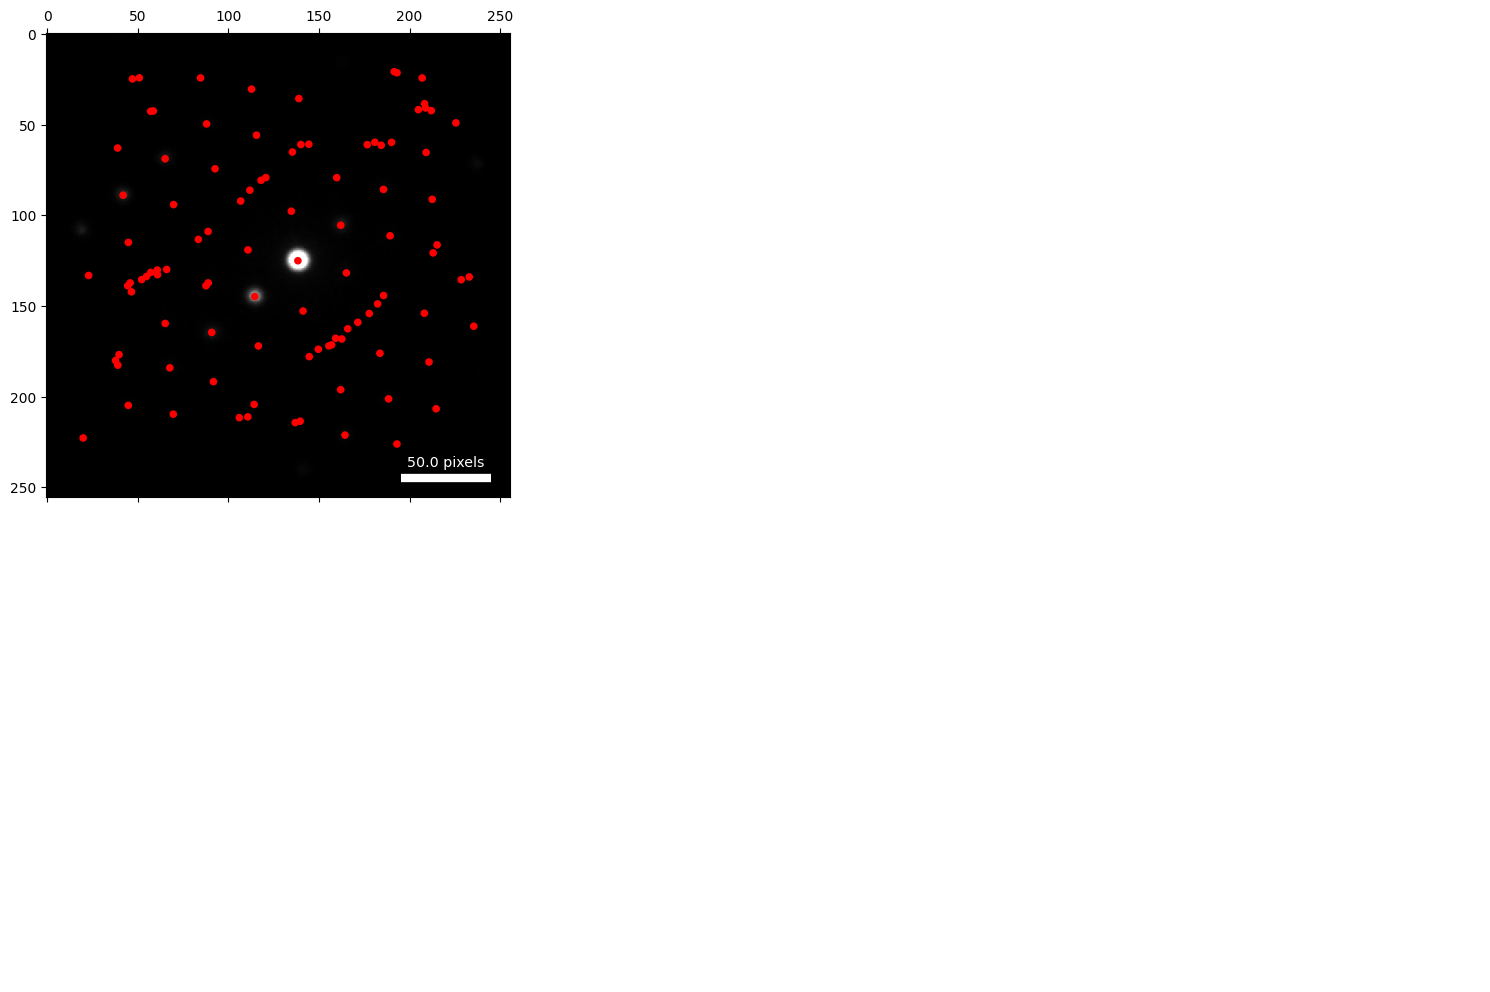

In [38]:

x_range = [0, 128]
y_range = [0, 128]

x_list = [2]
y_list = [0]

color_list = ['r','r','r','r','r','r']

disk_detection_parameter_map = {
    'minAbsoluteIntensity': 0,
    'minRelativeIntensity': 0.00000001,
    'minPeakSpacing': 0,
    'edgeBoundary': 20,
    'sigma': 0,
    'maxNumPeaks': 100,
    'subpixel' : 'poly',
    'corrPower': 1.0,
    'CUDA': False
}

disk_detection_check_result = data_cube.find_Bragg_disks(
    data = (x_list, y_list),
    template = probe.kernel,
    **disk_detection_parameter_map
)

py4DSTEM.visualize.show_image_grid(
    get_ar = lambda i: data_cube[x_list[i], y_list[i], :, :],
    H = 2, 
    W = 3,
    axsize = (5, 5),
    scaling = 'power',
    power = 1,
    vmin = 0.1, 
    vmax = 0.999,
    get_bordercolor = None,
    get_x = lambda i: disk_detection_check_result[i].data['qx'],
    get_y = lambda i: disk_detection_check_result[i].data['qy'],
    get_pointcolors = lambda i: color_list[i],
    open_circles = False,
    scale = 20
)

In [16]:
disk_detection_check_result[0].data

array([(124.95018513, 138.18769817, 1.67138838e+03),
       (144.72145916, 114.64095498, 2.31677953e+02),
       (105.63433582, 161.92002297, 9.25722586e+01),
       ( 72.23397704, 235.45639774, 5.09706774e+01),
       (164.5639646 ,  90.72232701, 4.84993959e+01),
       ( 88.72400321,  42.12007777, 3.81539674e+01),
       (219.75578495, 164.09991077, 3.39164479e+01),
       (180.24475772, 211.43387609, 2.85847300e+01),
       (200.18250555, 187.91600862, 2.74466166e+01),
       ( 68.67564759,  64.41880323, 2.68389664e+01),
       ( 91.81989639, 210.97750111, 1.88964269e+01),
       ( 55.67129095, 114.54402044, 1.86186402e+01),
       (203.25664861,  44.70886363, 1.58273057e+01),
       (184.59735525,  67.1010225 , 1.51355913e+01),
       ( 85.37196767, 185.46751552, 1.34896779e+01),
       ( 35.60899668, 139.05954171, 1.08300960e+01),
       (131.92637079, 164.87459924, 1.04493079e+01),
       ( 49.60273968,  88.15200956, 1.04084693e+01),
       (111.72024408, 188.20392174, 7.99637480

In [17]:
x_list

array([ 31,  66, 126,  31,   8, 113])

In [18]:
from Py4dstemProcessor import Py4dstem_Processor
from DM4Processor import DM4_Processor


In [19]:
DM4_Processor.load_file(r"D:\shenzhen_data.dm4")



In [20]:
Py4dstem_Processor.load_data(DM4_Processor.raw_data, DM4_Processor.x_range, DM4_Processor.y_range)


100%|██████████| 65536/65536 [00:03<00:00, 16916.84it/s]


In [21]:
adf = Py4dstem_Processor.get_adf()

In [22]:
import matplotlib.pyplot as plt


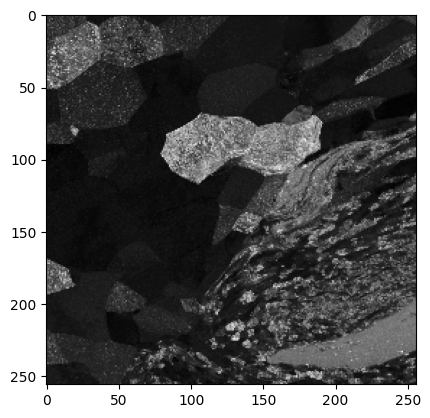

In [23]:
plt.imshow(adf, cmap = 'gray')


In [24]:
probe = Py4dstem_Processor.set_probe()


In [29]:
data = Py4dstem_Processor.find_bragg_disks(2)

2 0


In [28]:
img = DM4_Processor.get_img(2)

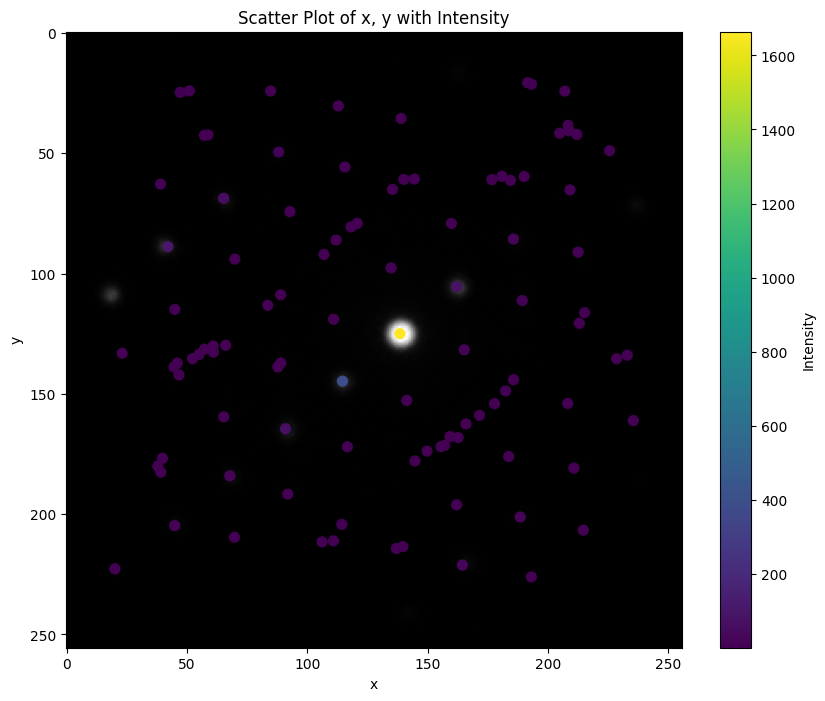

In [39]:
x = data['qx']
y = data['qy']
intensity = data['intensity']

# 创建散点图
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap = 'gray')
plt.scatter(y, x, c=intensity, cmap='viridis', s=50)

# 添加颜色条
plt.colorbar(label='Intensity')

# 设置标题和标签
plt.title('Scatter Plot of x, y with Intensity')
plt.xlabel('x')
plt.ylabel('y')


# 显示图形
plt.show()

In [65]:
normalized_img = (img-np.min(img))/(np.max(img)-np.min(img))
normalized_img = normalized_img.astype(np.float32)


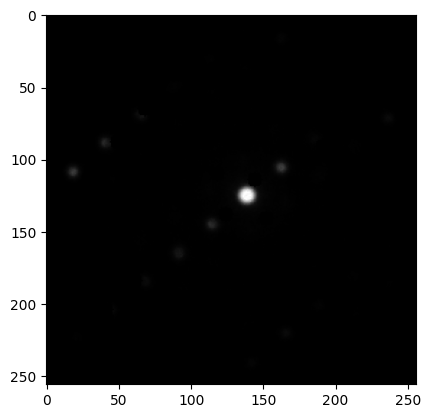

In [66]:
plt.imshow(normalized_img, cmap = 'gray')


In [67]:
import cv2
normalized_img = cv2.cvtColor(normalized_img, cv2.COLOR_GRAY2BGR)


In [70]:
for i in range(len(x)):
    color = (0, 0, 1)
    cv2.circle(normalized_img, float(y[i]), float(x[i]), 2, color, -1)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Input argument doesn't provide sequence protocol
>  - Can't parse 'center'. Input argument doesn't provide sequence protocol


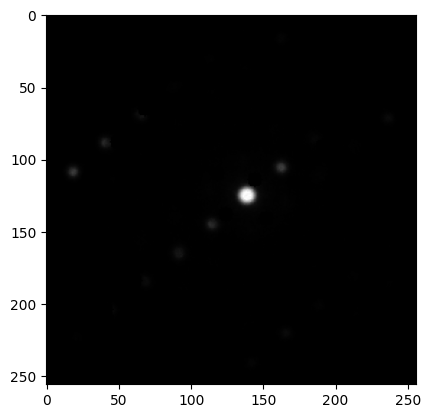

In [71]:
plt.imshow(normalized_img)
